In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv("bank-additional-full.csv", delimiter=";")

#basic information about the dataset
print(data.info())

# Display basic statistics about numerical features
print(data.describe())

# Display the first few rows of the dataset
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
#Data exploration
import pandas as pd

# summary of numerical features
print("\nSummary statistics of numerical features:")
print(bank_data.describe())

# distribution of the target variable
print("\nDistribution of the target variable:")
print(bank_data['y'].value_counts())

# unique values and their counts
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    print(f"\nUnique values and counts for {col}:")
    print(bank_data[col].value_counts())




Summary statistics of numerical features:
               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        

In [8]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import time

# neural network (NN) architecture
class Perceptron(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Load the Bank Marketing dataset
bank_data = pd.read_csv("bank-additional-full.csv", delimiter=";")

# Data Preprocessing
# Drop irrelevant columns
bank_data = bank_data.drop(['day_of_week', 'duration', 'campaign', 'pdays', 'previous'], axis=1)

# Encoding categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    bank_data[col] = label_encoders[col].fit_transform(bank_data[col])

# Spliting features (X) and target variable (y)
X = bank_data.drop('y', axis=1)
y = bank_data['y']

# Spliting the dataset in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Converting data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.int64)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.int64)

# Save preprocessed features for matlab
X_train_processed = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_processed = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train_processed.to_csv("X_train_processed.csv", index=False)
X_test_processed.to_csv("X_test_processed.csv", index=False)

# Save preprocessed target variables
y_train_processed = pd.DataFrame(y_train_encoded, columns=['target'])
y_test_processed = pd.DataFrame(y_test_encoded, columns=['target'])

y_train_processed.to_csv("y_train_processed.csv", index=False)
y_test_processed.to_csv("y_test_processed.csv", index=False)

# Hyperparameters
hidden_sizes = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]
num_epochs = 100

results = []

# Training 
for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        print(f"\nTraining model with hidden size: {hidden_size} and learning rate: {learning_rate}")
        
        # Initialize the model
        model = Perceptron(input_size=X_train_tensor.shape[1], hidden_size=hidden_size, output_size=2)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss() #cross-entropy loss
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)

        # Training the model
        start_time = time.time()
        for epoch in range(num_epochs):
            outputs = model(X_train_tensor) #forwardpass
            loss = criterion(outputs, y_train_tensor) #lass computation

            optimizer.zero_grad()
            loss.backward()  #backpropogation
            optimizer.step() #weight updation

            if (epoch+1) % 10 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
        end_time = time.time()
        training_time = end_time - start_time

        # Testing
        with torch.no_grad():
            outputs = model(X_test_tensor)
            _, predicted = torch.max(outputs, 1)
            accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
            print(f'Test Accuracy: {accuracy:.4f}')

        
        results.append({
            'Hidden Size': hidden_size,
            'Learning Rate': learning_rate,
            'Training Time (s)': training_time,
            'Test Accuracy': accuracy
        })

# Results Summary
results_df = pd.DataFrame(results)
print("\nResults Summary:")
print(results_df)



Training model with hidden size: 32 and learning rate: 0.001
Epoch [10/100], Loss: 0.7692
Epoch [20/100], Loss: 0.7593
Epoch [30/100], Loss: 0.7497
Epoch [40/100], Loss: 0.7404
Epoch [50/100], Loss: 0.7313
Epoch [60/100], Loss: 0.7224
Epoch [70/100], Loss: 0.7139
Epoch [80/100], Loss: 0.7055
Epoch [90/100], Loss: 0.6974
Epoch [100/100], Loss: 0.6895
Test Accuracy: 0.5529

Training model with hidden size: 32 and learning rate: 0.01
Epoch [10/100], Loss: 0.6590
Epoch [20/100], Loss: 0.6027
Epoch [30/100], Loss: 0.5595
Epoch [40/100], Loss: 0.5258
Epoch [50/100], Loss: 0.4990
Epoch [60/100], Loss: 0.4774
Epoch [70/100], Loss: 0.4596
Epoch [80/100], Loss: 0.4449
Epoch [90/100], Loss: 0.4325
Epoch [100/100], Loss: 0.4219
Test Accuracy: 0.8865

Training model with hidden size: 32 and learning rate: 0.1
Epoch [10/100], Loss: 0.3770
Epoch [20/100], Loss: 0.3331
Epoch [30/100], Loss: 0.3191
Epoch [40/100], Loss: 0.3111
Epoch [50/100], Loss: 0.3055
Epoch [60/100], Loss: 0.3015
Epoch [70/100], L

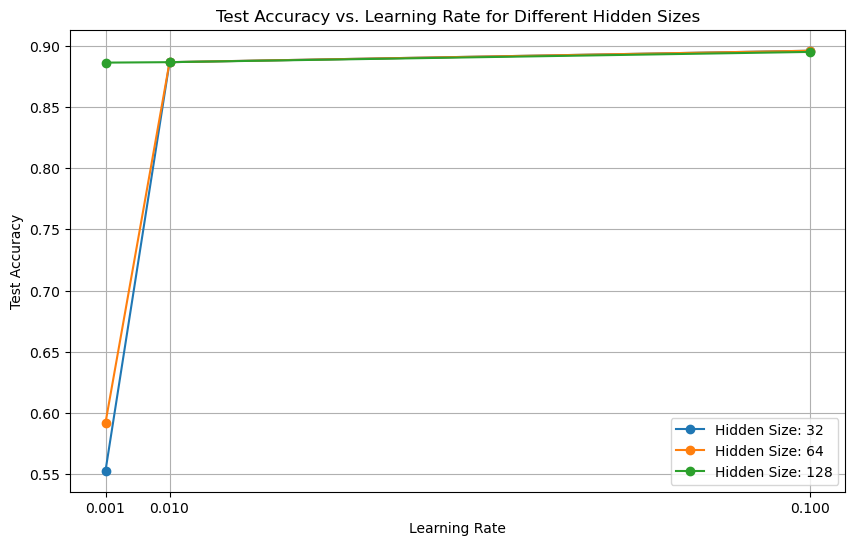

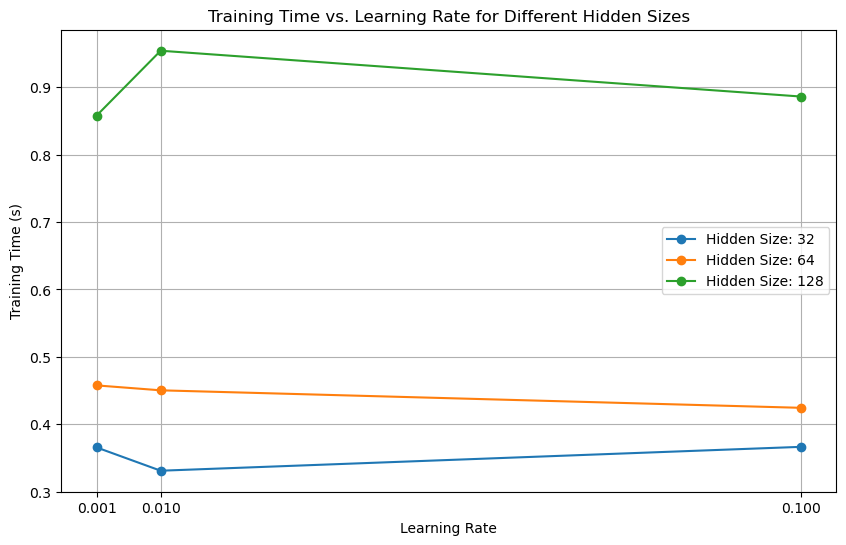

In [9]:
import matplotlib.pyplot as plt

# Plot test accuracy for different hyperparameter configurations
plt.figure(figsize=(10, 6))
for hidden_size in hidden_sizes:
    accuracy_values = results_df[results_df['Hidden Size'] == hidden_size]['Test Accuracy']
    plt.plot(learning_rates, accuracy_values, marker='o', label=f'Hidden Size: {hidden_size}')
plt.title('Test Accuracy vs. Learning Rate for Different Hidden Sizes')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.xticks(learning_rates)
plt.legend()
plt.grid(True)
plt.show()

# Plot training time for different hyperparameter configurations
plt.figure(figsize=(10, 6))
for hidden_size in hidden_sizes:
    time_values = results_df[results_df['Hidden Size'] == hidden_size]['Training Time (s)']
    plt.plot(learning_rates, time_values, marker='o', label=f'Hidden Size: {hidden_size}')
plt.title('Training Time vs. Learning Rate for Different Hidden Sizes')
plt.xlabel('Learning Rate')
plt.ylabel('Training Time (s)')
plt.xticks(learning_rates)
plt.legend()
plt.grid(True)
plt.show()


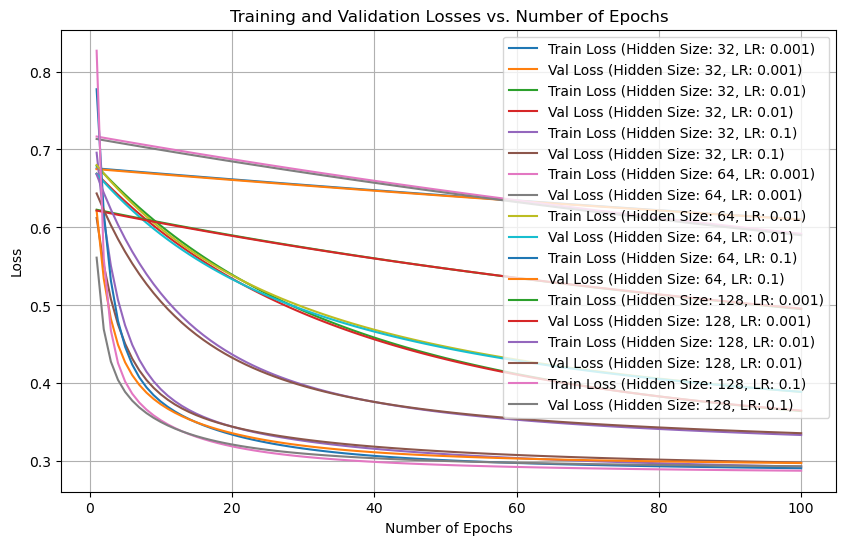

In [12]:
#training and validation loss for different hyperparameter configurations
plt.figure(figsize=(10, 6))
for result in results:
    hidden_size = result['Hidden Size']
    learning_rate = result['Learning Rate']
    train_losses = result['Train Losses']
    val_losses = result['Val Losses']
    plt.plot(range(1, num_epochs+1), train_losses, label=f'Train Loss (Hidden Size: {hidden_size}, LR: {learning_rate})')
    plt.plot(range(1, num_epochs+1), val_losses, label=f'Val Loss (Hidden Size: {hidden_size}, LR: {learning_rate})')

plt.title('Training and Validation Losses vs. Number of Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


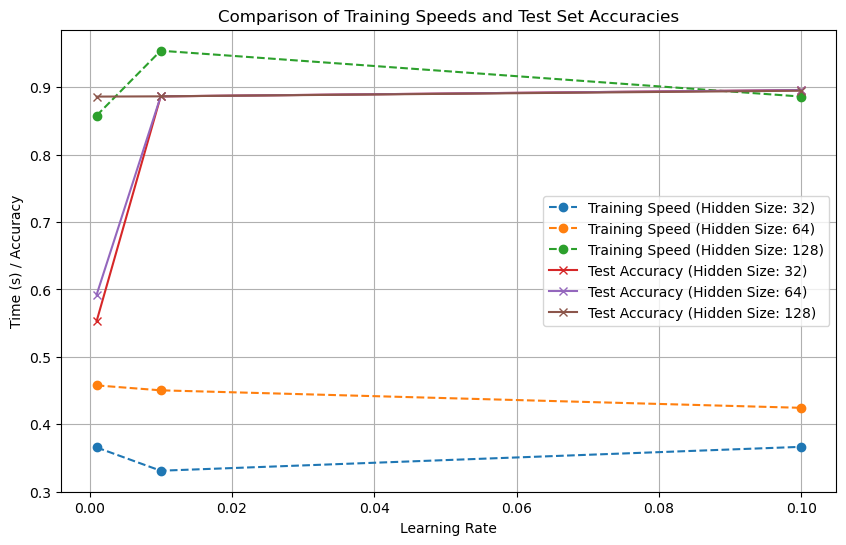

In [11]:
import matplotlib.pyplot as plt

# Define hidden_sizes based on the results obtained
hidden_sizes = [32, 64, 128]

# Plotting Training Speeds and Test Set Accuracies in One Figure
plt.figure(figsize=(10, 6))

# Plot Training Speeds
for hidden_size in hidden_sizes:
    plt.plot(results_df[results_df['Hidden Size'] == hidden_size]['Learning Rate'],
             results_df[results_df['Hidden Size'] == hidden_size]['Training Time (s)'],
             label=f'Training Speed (Hidden Size: {hidden_size})', linestyle='--', marker='o')

# Plot Test Set Accuracies
for hidden_size in hidden_sizes:
    plt.plot(results_df[results_df['Hidden Size'] == hidden_size]['Learning Rate'],
             results_df[results_df['Hidden Size'] == hidden_size]['Test Accuracy'],
             label=f'Test Accuracy (Hidden Size: {hidden_size})', linestyle='-', marker='x')

plt.xlabel('Learning Rate')
plt.ylabel('Time (s) / Accuracy')
plt.title('Comparison of Training Speeds and Test Set Accuracies')
plt.legend()
plt.grid(True)
plt.show()
